<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sl. No.                     37 non-null     object 
 1   State/UT                    37 non-null     object 
 2   Farmers/Cultivators - 2017  36 non-null     float64
 3   Farmers/Cultivators - 2018  36 non-null     float64
 4   Farmers/Cultivators - 2019  36 non-null     float64
 5   Farmers/Cultivators - 2020  37 non-null     int64  
 6   Farmers/Cultivators - 2021  37 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ KB
None

Missing values:
 Sl. No.                       0
State/UT                      0
Farmers/Cultivators - 2017    1
Farmers/Cultivators - 2018    1
Farmers/Cultivators - 2019    1
Farmers/Cultivators - 2020    0
Farmers/Cultivators - 2021    0
dtype: int64
             state/ut  year  suicides
37     Andhra Pradesh  20

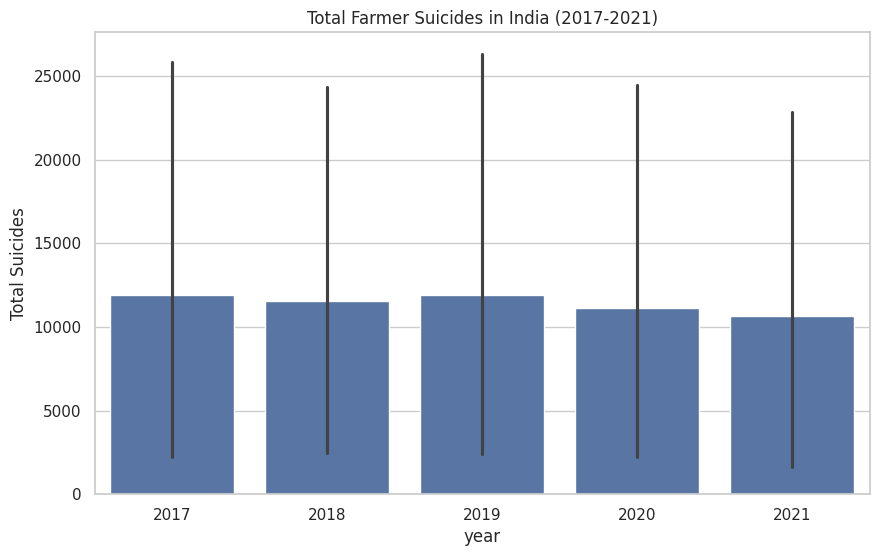

<ipython-input-2-2768241221>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")


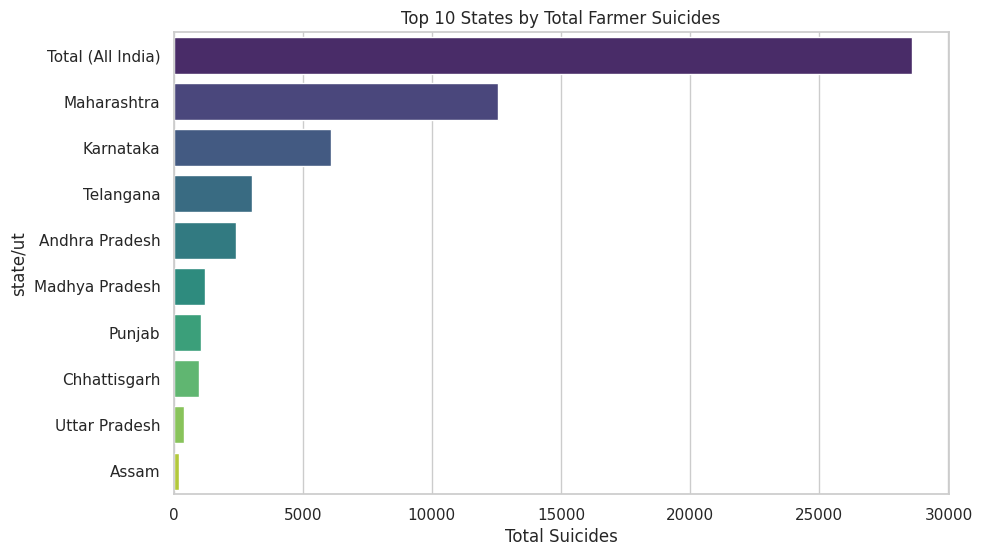

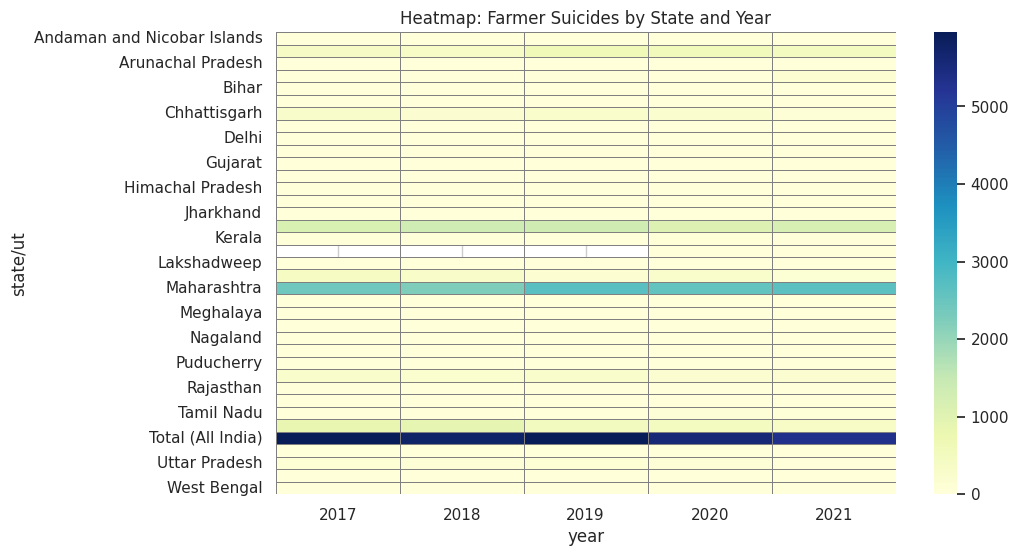

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 0: Import libraries
import seaborn as sns

# Optional: Make charts look prettier
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 1: Load the data
df = pd.read_csv("/content/dataset farmer.csv")  # update path if needed
df.head()

# Step 2: Check for nulls and basic structure
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Step 3: Rename columns for easier handling (optional)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Step 4: Melt the dataframe to long format (year-wise)
df_melted = df.melt(id_vars='state/ut', var_name='year', value_name='suicides')

# Step 5: Clean year column (remove prefix if needed)
df_melted['year'] = df_melted['year'].str.extract(r'(\d{4})')  # extract just the year
df_melted.dropna(inplace=True)
df_melted['suicides'] = pd.to_numeric(df_melted['suicides'], errors='coerce')

# Step 6: Final checks
print(df_melted.head())
print(df_melted.describe())

# Step 7: Basic Visualizations

# 7.1 Total suicides per year
plt.figure()
sns.barplot(data=df_melted, x='year', y='suicides', estimator=sum)
plt.title("Total Farmer Suicides in India (2017-2021)")
plt.ylabel("Total Suicides")
plt.show()

# 7.2 Top 10 states with highest total suicides
top_states = df_melted.groupby("state/ut")["suicides"].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 10 States by Total Farmer Suicides")
plt.xlabel("Total Suicides")
plt.show()

# 7.3 Heatmap of suicides by state/year
pivot = df_melted.pivot_table(index='state/ut', columns='year', values='suicides', aggfunc='sum')
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Heatmap: Farmer Suicides by State and Year")
plt.show()



In [ ]:
# Export cleaned data to CSV for Tableau use
df_melted.to_csv("cleaned_farmer_suicide_data.csv", index=False)
